## Importing Important Liabraries

In [1]:
import numpy as np
import pandas as pd
import tensorflow
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout

## Importing Dataset

In [2]:
df = pd.read_csv("../input/news-articles/news.csv")

## Analysing Dataframe

In [3]:
df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [4]:
df.shape

(26000, 5)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26000 entries, 0 to 25999
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      26000 non-null  int64 
 1   title   25320 non-null  object
 2   author  23540 non-null  object
 3   text    25954 non-null  object
 4   label   26000 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 1015.8+ KB


## Data Wrangling

In [6]:
df["news"] = df["title"] + ". " + df["text"]

In [7]:
df

,id,title,author,text,label,news
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1,House Dem Aide: We Didn’t Even See Comey’s Let...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0,"FLYNN: Hillary Clinton, Big Woman on Campus - ..."
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1,Why the Truth Might Get You Fired. Why the Tru...
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1,15 Civilians Killed In Single US Airstrike Hav...
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1,Iranian woman jailed for fictional unpublished...
...,...,...,...,...,...,...
25995,25995,The Bangladeshi Traffic Jam That Never Ends - ...,Jody Rosen,Of all the dysfunctions that plague the world’...,0,The Bangladeshi Traffic Jam That Never Ends - ...
25996,25996,John Kasich Signs One Abortion Bill in Ohio bu...,Sheryl Gay Stolberg,WASHINGTON — Gov. John Kasich of Ohio on Tu...,1,John Kasich Signs One Abortion Bill in Ohio bu...
25997,25997,"California Today: What, Exactly, Is in Your Su...",Mike McPhate,Good morning. (Want to get California Today by...,0,"California Today: What, Exactly, Is in Your Su..."
25998,25998,300 US Marines To Be Deployed To Russian Borde...,NaN,« Previous - Next » 300 US Marines To Be Deplo...,1,300 US Marines To Be Deployed To Russian Borde...


In [8]:
df.drop(df.columns[[0,1,2,3]], axis=1, inplace=True)

In [9]:
df

,label,news
0,1,House Dem Aide: We Didn’t Even See Comey’s Let...
1,0,"FLYNN: Hillary Clinton, Big Woman on Campus - ..."
2,1,Why the Truth Might Get You Fired. Why the Tru...
3,1,15 Civilians Killed In Single US Airstrike Hav...
4,1,Iranian woman jailed for fictional unpublished...
...,...,...
25995,0,The Bangladeshi Traffic Jam That Never Ends - ...
25996,1,John Kasich Signs One Abortion Bill in Ohio bu...
25997,0,"California Today: What, Exactly, Is in Your Su..."
25998,1,300 US Marines To Be Deployed To Russian Borde...


In [10]:
df = df.dropna()

In [11]:
df.reset_index(drop=True, inplace = True)

In [12]:
df

,label,news
0,1,House Dem Aide: We Didn’t Even See Comey’s Let...
1,0,"FLYNN: Hillary Clinton, Big Woman on Campus - ..."
2,1,Why the Truth Might Get You Fired. Why the Tru...
3,1,15 Civilians Killed In Single US Airstrike Hav...
4,1,Iranian woman jailed for fictional unpublished...
...,...,...
25269,0,The Bangladeshi Traffic Jam That Never Ends - ...
25270,1,John Kasich Signs One Abortion Bill in Ohio bu...
25271,0,"California Today: What, Exactly, Is in Your Su..."
25272,1,300 US Marines To Be Deployed To Russian Borde...


In [13]:
for i in range(0,5):
    print(f"News {i+1}: \n")
    print(df["news"][i] +"\n")

News 1: 

House Dem Aide: We Didn’t Even See Comey’s Letter Until Jason Chaffetz Tweeted It. House Dem Aide: We Didn’t Even See Comey’s Letter Until Jason Chaffetz Tweeted It By Darrell Lucus on October 30, 2016 Subscribe Jason Chaffetz on the stump in American Fork, Utah ( image courtesy Michael Jolley, available under a Creative Commons-BY license) 
With apologies to Keith Olbermann, there is no doubt who the Worst Person in The World is this week–FBI Director James Comey. But according to a House Democratic aide, it looks like we also know who the second-worst person is as well. It turns out that when Comey sent his now-infamous letter announcing that the FBI was looking into emails that may be related to Hillary Clinton’s email server, the ranking Democrats on the relevant committees didn’t hear about it from Comey. They found out via a tweet from one of the Republican committee chairmen. 
As we now know, Comey notified the Republican chairmen and Democratic ranking members of the 

In [14]:
df.groupby(df["label"]).count()

,news
label,
0,12721
1,12553


#### Dataset is balanced

In [15]:
X=df.drop('label',axis=1)

In [16]:
y=df['label']

In [17]:
X.shape

(25274, 1)

In [18]:
y.shape

(25274,)

In [19]:
messages=X.copy()

In [20]:
messages['news'][0]

'House Dem Aide: We Didn’t Even See Comey’s Letter Until Jason Chaffetz Tweeted It. House Dem Aide: We Didn’t Even See Comey’s Letter Until Jason Chaffetz Tweeted It By Darrell Lucus on October 30, 2016 Subscribe Jason Chaffetz on the stump in American Fork, Utah ( image courtesy Michael Jolley, available under a Creative Commons-BY license) \nWith apologies to Keith Olbermann, there is no doubt who the Worst Person in The World is this week–FBI Director James Comey. But according to a House Democratic aide, it looks like we also know who the second-worst person is as well. It turns out that when Comey sent his now-infamous letter announcing that the FBI was looking into emails that may be related to Hillary Clinton’s email server, the ranking Democrats on the relevant committees didn’t hear about it from Comey. They found out via a tweet from one of the Republican committee chairmen. \nAs we now know, Comey notified the Republican chairmen and Democratic ranking members of the House I

In [21]:
messages.reset_index(inplace=True)

## Dataset Preprocessing

In [22]:
import nltk
import re
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

In [23]:
nltk.download('stopwords')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /usr/share/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [25]:
lemmatizer = WordNetLemmatizer()
corpus = []
for i in range(0, len(messages)):
#     print(i)
    review = re.sub('[^a-zA-Z]', ' ', messages['news'][i])
    review = review.lower()
    review = review.split()
    
    review = [lemmatizer.lemmatize(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

In [26]:
corpus[0]

'house dem aide even see comey letter jason chaffetz tweeted house dem aide even see comey letter jason chaffetz tweeted darrell lucus october subscribe jason chaffetz stump american fork utah image courtesy michael jolley available creative common license apology keith olbermann doubt worst person world week fbi director james comey according house democratic aide look like also know second worst person well turn comey sent infamous letter announcing fbi looking email may related hillary clinton email server ranking democrat relevant committee hear comey found via tweet one republican committee chairman know comey notified republican chairman democratic ranking member house intelligence judiciary oversight committee agency reviewing email recently discovered order see contained classified information long letter went oversight committee chairman jason chaffetz set political world ablaze tweet fbi dir informed fbi learned existence email appear pertinent investigation case reopened jas

### OneHot Representation

In [27]:
voc_size=10000
onehot_repr=[one_hot(words,voc_size)for words in corpus]
onehot_repr[0]

[5049,
 8759,
 6527,
 4989,
 2781,
 4252,
 2423,
 7320,
 4754,
 7031,
 5049,
 8759,
 6527,
 4989,
 2781,
 4252,
 2423,
 7320,
 4754,
 7031,
 5670,
 5548,
 7710,
 6679,
 7320,
 4754,
 6227,
 2173,
 9405,
 7341,
 4349,
 2326,
 4571,
 5438,
 6501,
 2515,
 1135,
 3371,
 445,
 9740,
 6358,
 6062,
 5420,
 9287,
 5334,
 9582,
 4255,
 1848,
 2823,
 4252,
 730,
 5049,
 6871,
 6527,
 3177,
 4868,
 6444,
 2039,
 3584,
 5420,
 9287,
 6586,
 208,
 4252,
 9394,
 2002,
 2423,
 5905,
 4255,
 2892,
 3726,
 3232,
 6499,
 7267,
 2368,
 3726,
 2239,
 929,
 4381,
 8783,
 2881,
 378,
 4252,
 8016,
 5202,
 7656,
 7369,
 1871,
 2881,
 4828,
 2039,
 4252,
 1918,
 1871,
 4828,
 6871,
 929,
 8948,
 5049,
 6876,
 3631,
 2041,
 2881,
 1692,
 8874,
 3726,
 9486,
 1682,
 6487,
 2781,
 1072,
 6591,
 4694,
 2425,
 2423,
 8301,
 2041,
 2881,
 4828,
 7320,
 4754,
 5360,
 5685,
 5334,
 3190,
 7656,
 4255,
 2655,
 3899,
 4255,
 2029,
 3451,
 3726,
 1527,
 7118,
 4632,
 1432,
 7527,
 7320,
 4754,
 5946,
 7710,
 1293,
 2039

### Embedding Representation

In [28]:
sent_length=500
embedded_docs=pad_sequences(onehot_repr,padding='pre',maxlen=sent_length)
print(embedded_docs)

[[   0    0    0 ... 2768 4818 6258]
 [   0    0    0 ... 2527 7222 8000]
 [1530 7673 4785 ... 7346 6728 1104]
 ...
 [8016 1939  143 ... 7779 3155 5884]
 [   0    0    0 ... 6184 6499 5805]
 [8024 3544 1486 ... 4445 2554  618]]


In [29]:
embedded_docs[0]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0, 5049, 8759, 6527, 4989, 2781, 4252, 2423, 7320, 4754,
       7031, 5049, 8759, 6527, 4989, 2781, 4252, 2423, 7320, 4754, 7031,
       5670, 5548, 7710, 6679, 7320, 4754, 6227, 2173, 9405, 7341, 4349,
       2326, 4571, 5438, 6501, 2515, 1135, 3371,  445, 9740, 6358, 6062,
       5420, 9287, 5334, 9582, 4255, 1848, 2823, 4252,  730, 5049, 6871,
       6527, 3177, 4868, 6444, 2039, 3584, 5420, 9287, 6586,  208, 4252,
       9394, 2002, 2423, 5905, 4255, 2892, 3726, 3232, 6499, 7267, 2368,
       3726, 2239,  929, 4381, 8783, 2881,  378, 4252, 8016, 5202, 7656,
       7369, 1871, 2881, 4828, 2039, 4252, 1918, 18

## Creating Model

In [31]:
embedding_vector_features=500
model=Sequential()
model.add(Embedding(voc_size,embedding_vector_features,input_length=sent_length))
model.add(Dropout(0.2))
model.add(LSTM(100))
model.add(Dropout(0.2))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 500, 500)          5000000   
_________________________________________________________________
dropout_2 (Dropout)          (None, 500, 500)          0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               240400    
_________________________________________________________________
dropout_3 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 101       
Total params: 5,240,501
Trainable params: 5,240,501
Non-trainable params: 0
_________________________________________________________________
None


In [32]:
len(embedded_docs),y.shape

(25274, (25274,))

In [33]:
X_final=np.array(embedded_docs)
y_final=np.array(y)

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size=0.20, random_state=0)

## Model Training

In [39]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=10,batch_size=64)

Epoch 1/10
316/316 [==============================] - 12s 39ms/step - loss: 0.0113 - accuracy: 0.9947 - val_loss: 1.2393 - val_accuracy: 0.8243
Epoch 2/10
316/316 [==============================] - 12s 39ms/step - loss: 0.0083 - accuracy: 0.9959 - val_loss: 1.3341 - val_accuracy: 0.8085
Epoch 3/10
316/316 [==============================] - 12s 39ms/step - loss: 0.0096 - accuracy: 0.9954 - val_loss: 1.2663 - val_accuracy: 0.8249
Epoch 4/10
316/316 [==============================] - 12s 39ms/step - loss: 0.0117 - accuracy: 0.9951 - val_loss: 1.2328 - val_accuracy: 0.8231
Epoch 5/10
316/316 [==============================] - 12s 39ms/step - loss: 0.0131 - accuracy: 0.9943 - val_loss: 1.2389 - val_accuracy: 0.8249
Epoch 6/10
316/316 [==============================] - 12s 39ms/step - loss: 0.0098 - accuracy: 0.9954 - val_loss: 1.2299 - val_accuracy: 0.8291
Epoch 7/10
316/316 [==============================] - 12s 39ms/step - loss: 0.0143 - accuracy: 0.9937 - val_loss: 1.2170 - val_accuracy:

In [40]:
y_pred=model.predict(X_test)

In [41]:
y_pred = y_pred.flatten()
y_pred = np.where(y_pred > 0.5, 1, 0)

## Confusion Matrix And Accuracy

In [42]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)

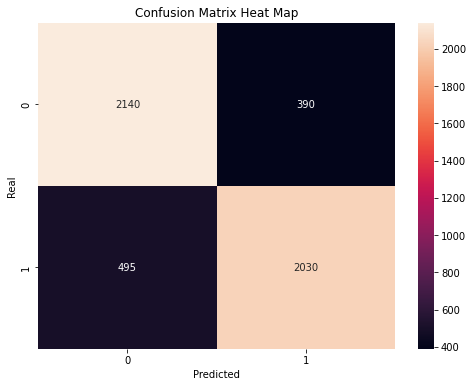

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize = (8,6))
sns.heatmap(cm, annot=True, fmt = "d")
plt.xlabel('Predicted')
plt.ylabel('Real')
plt.title("Confusion Matrix Heat Map")
plt.show()

In [45]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.8249258160237388

### Accuracy of testing dataset is 82.49%